# Autumn's exploration

Looking for periodic behaviour.

In [91]:
# Preliminary setup
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex

In [92]:
# Import dataset from df.pickle
nrg = pd.read_pickle('alldata_clean.pickle')
wx = pd.read_pickle('allwxdata.pickle')
df = pd.merge(nrg,wx,how='outer',left_index=True,right_index=True)

In [93]:
# Interpolate weather
df.relh.interpolate(inplace=True)
df.tmpc.interpolate(inplace=True)
df.alti.interpolate(inplace=True)
df.dwpc.interpolate(inplace=True)
df.drct.fillna(method='ffill',inplace=True) # Avoids having to deal with wind crossing north (360->0)
#pd.options.display.max_rows = 2000

# Delete pre-energy rows
df = df[~df.active.isnull()]
all = df # Store for later

# Energy vs Weather scatters
No obvious correlations.

In [99]:
ecols = ['active', 'sub1', 'sub2', 'sub3', 'house']
#ecols = ['sub1', 'sub2', 'sub3']
wxcols = ['relh','drct','alti','tmpc','dwpc']
df = df[ecols+wxcols].resample('1h').mean()

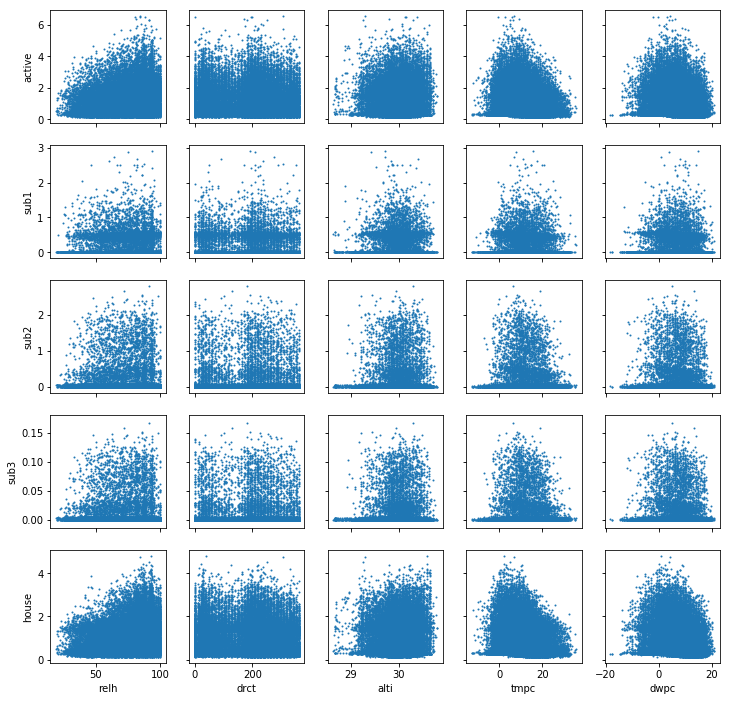

In [65]:
f, axes = plt.subplots(  nrows=len(ecols)
                       , ncols=len(wxcols)
                       , figsize=(12,12)
                       , sharex='col'
                       , sharey='row')  

for irow in range(0,len(ecols)):
    for icol,ax in enumerate(axes[irow,:]):
        en = ecols[irow]
        wx = wxcols[icol]
        df.plot.scatter(x=wx,y=en
                        ,ax=ax
                        ,s=1)
            

C:\Users\aju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\aju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\aju\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\aju\Anaconda3\lib\site-packages\matplotlib\contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\aju\Anaconda3\lib\site-packages\matplotlib\contour.py:1535: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\aju\Anaconda3\lib\site-packages\matplotlib\pyplot.py:5

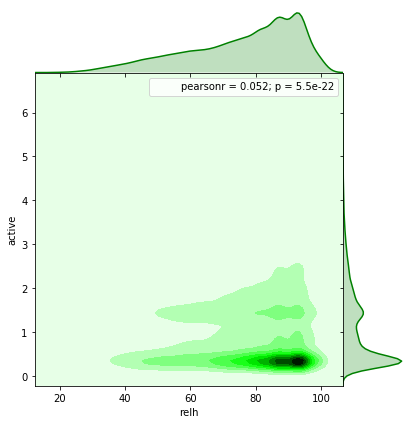

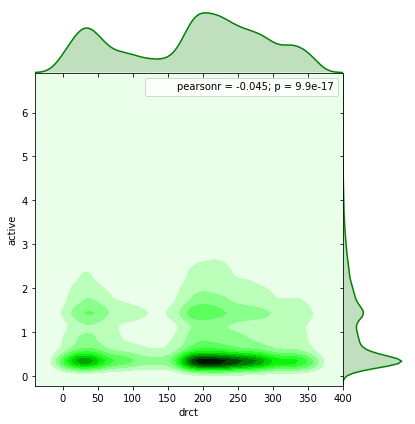

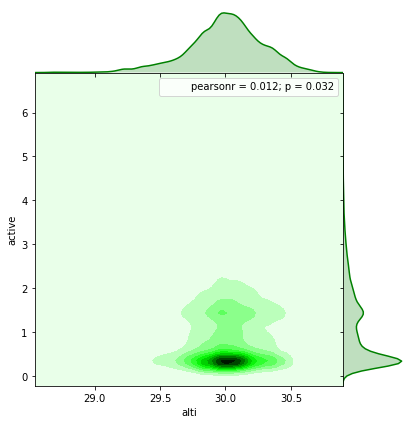

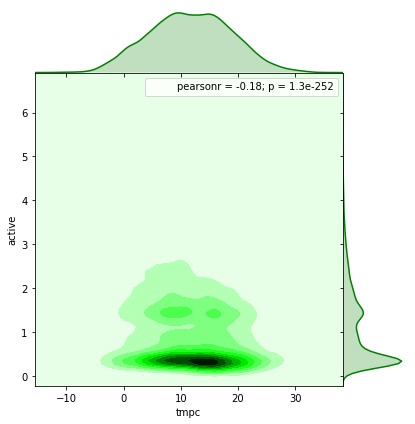

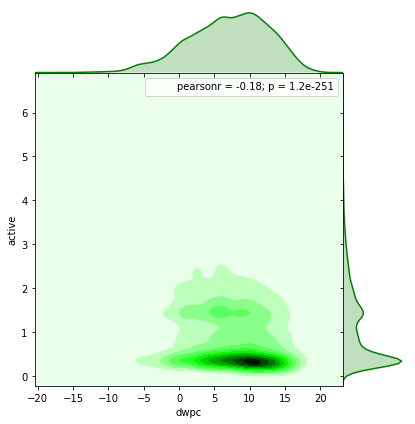

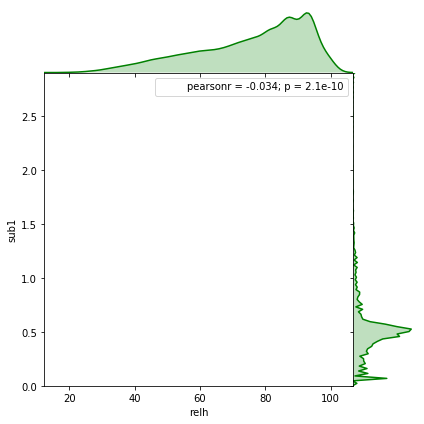

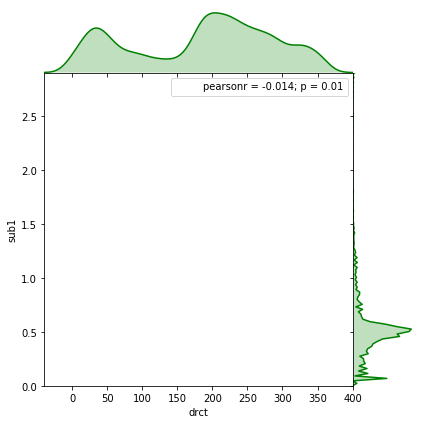

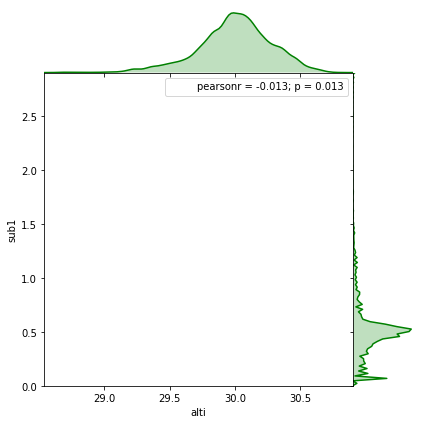

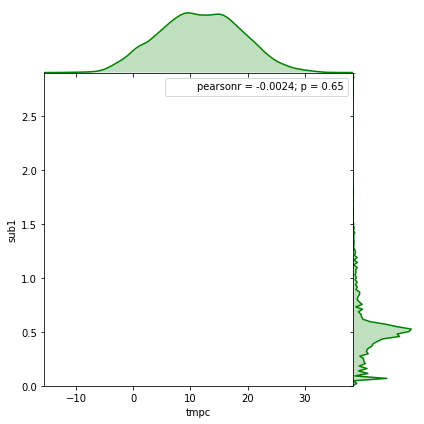

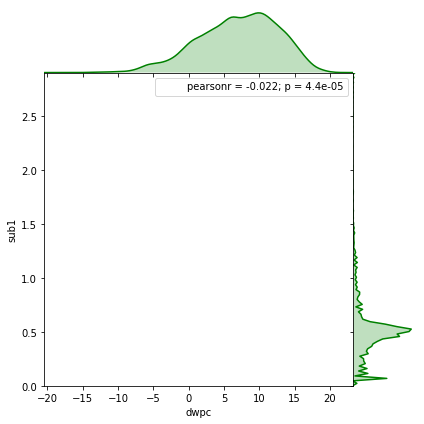

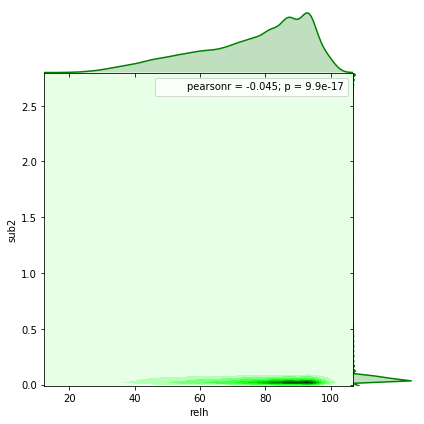

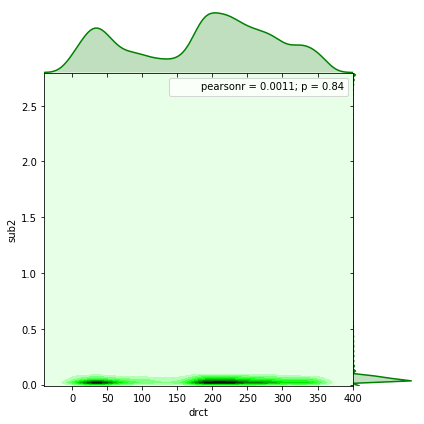

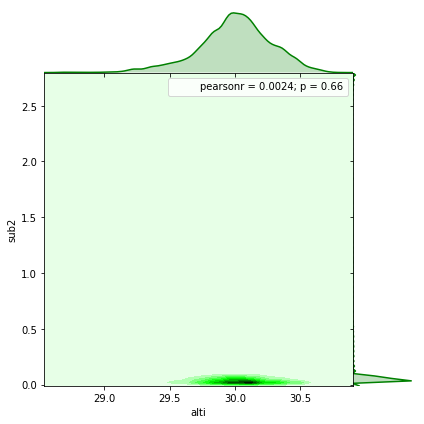

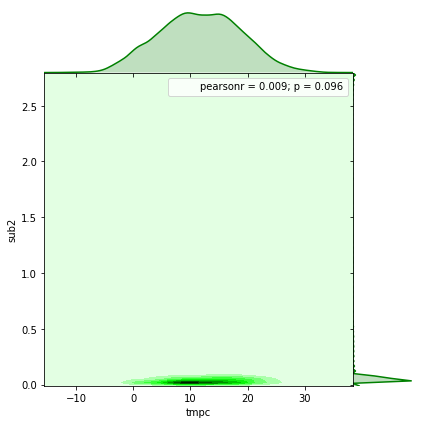

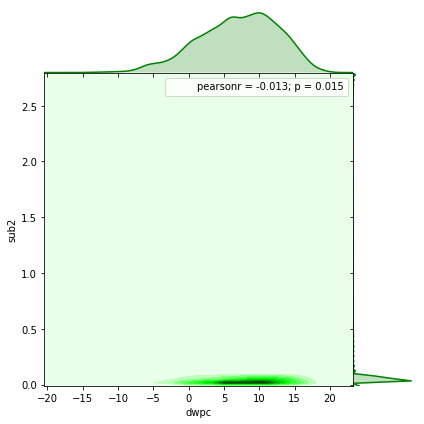

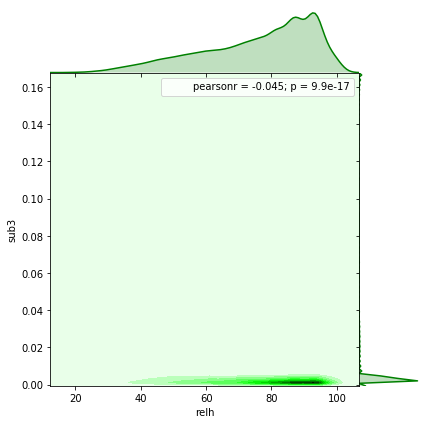

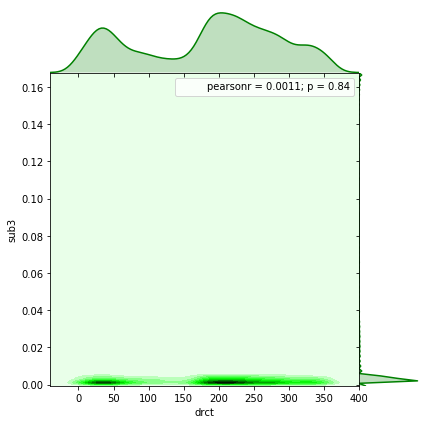

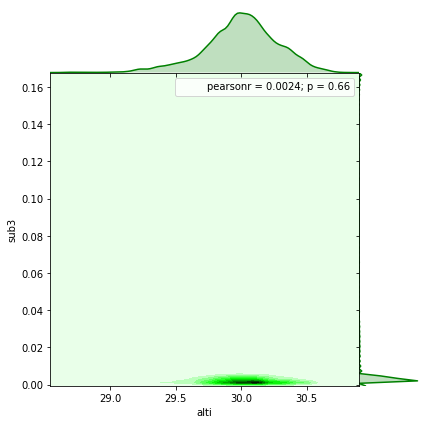

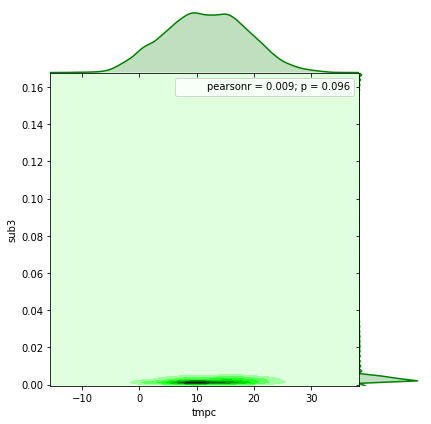

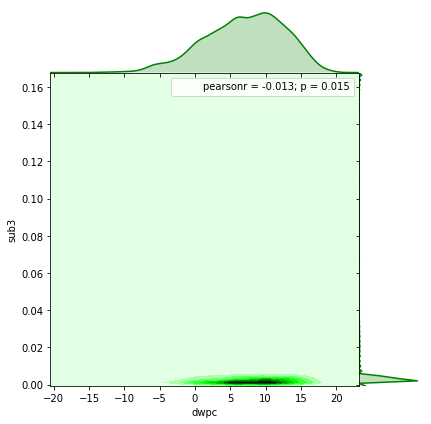

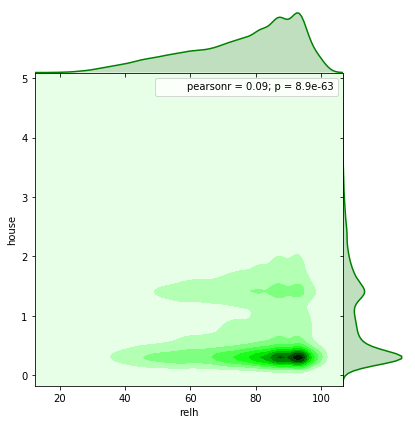

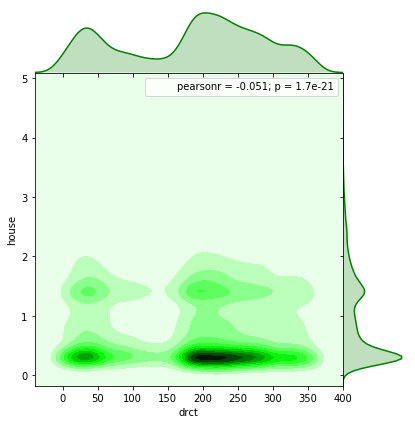

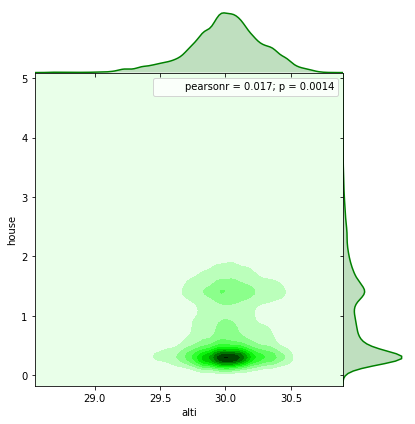

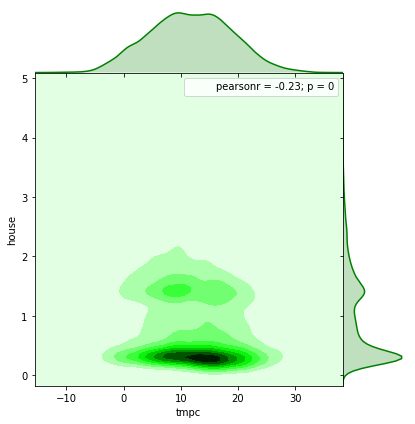

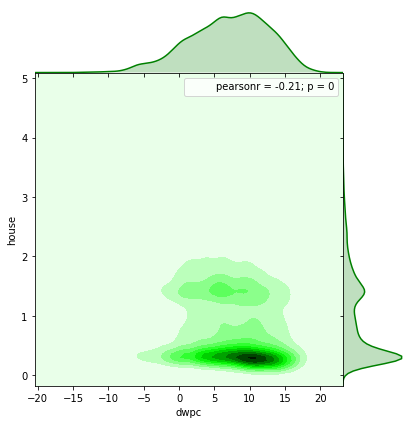

In [100]:
# heat map instead - NB that SNSjointplot doesn't work with subplot()
df.dropna(how='any',inplace=True)

for irow in range(0,len(ecols)):
    for icol in range(0,len(wxcols)):
        en = ecols[irow]
        wx = wxcols[icol]
        g = sns.jointplot(
                           data=df
                          , x=wx
                          , y=en
                          , kind="kde"
                          , space=0
                          , color="g"
                        )
        